In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from tqdm import trange

In [2]:
def spinson_independent_flip(colors, spinson):
    colors[spinson] = '#ff0000' if colors[spinson] == '#0000ff' else '#0000ff'
    
    return colors

In [3]:
def spinson_conformity_flip(Gs, colors, spinson, q):
    neighbours = []
    for graph in Gs:
        neighbours.extend(random.sample(list(graph.neighbors(spinson)), q))
    opinion = colors[neighbours[0]]
    same_opinion = True
    for spinson_neighbour in neighbours:
        if opinion == colors[spinson_neighbour] and same_opinion == True:
            same_opinion = True
        else:
            same_opinion = False

    if same_opinion == True:
        colors[spinson] = opinion

    return colors

In [4]:
def q_voter_simulation(Gs, p, q, iterations):
    magnetization = []
        
    colors = ['#0000ff'] * len(Gs[0].nodes())
    for i in range(iterations):
        for i in range(len(Gs[0])):
            spinson = random.choice(list(Gs[0].nodes()))  #  chooses one random node
            if random.random() < p:  #  does it act independtly? 
                if random.random() < 0.5:  # the same probability to change opinion
                    colors = spinson_independent_flip(colors, spinson)
            else:
                colors = spinson_conformity_flip(Gs, colors, spinson, q)

        magnetization.append((-1*colors.count('#ff0000') + 1*colors.count('#0000ff'))/len(Gs[0]))  # calculates magnetizations substituting 1 or -1 in a proper way
    
    return magnetization

In [5]:
def calculate_average_magnetization_final(Gs, ps, q, mc):
    magnetizations = []
    for j in trange(len(ps)):  
        magnetization = np.zeros(mc)
        for i in range(mc):    
            magnetization = magnetization + q_voter_simulation(Gs, ps[j], q, mc)
        magnetizations.append(magnetization[-1]/mc)
        
    return magnetizations

In [6]:
Gs = [nx.complete_graph(100), nx.complete_graph(100)]
mc = 100
q = 2
ps = np.linspace(0, 0.35, 100)

In [7]:
magnetization = calculate_average_magnetization_final(Gs, ps, q, mc)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [39:48<00:00, 23.89s/it]


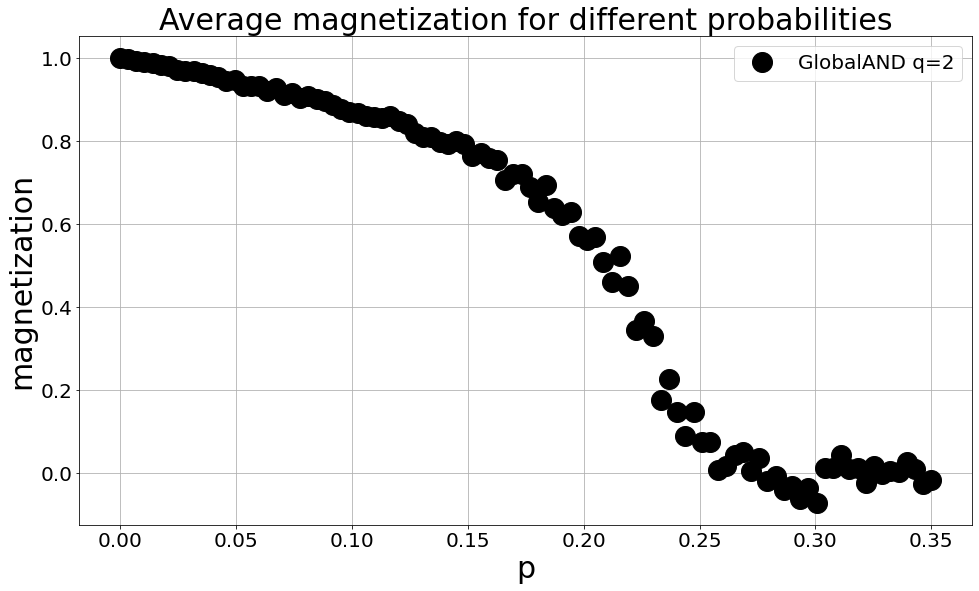

In [10]:
plt.figure(figsize=(16, 9))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.plot(ps, magnetization, markersize=20, marker='o', linewidth=0, color='black', label='GlobalAND q=2')
plt.xlabel('p', fontsize=30)
plt.ylabel('magnetization', fontsize=30)
plt.title('Average magnetization for different probabilities', fontsize=30)
plt.grid()

plt.legend(prop={'size': 20})